In [1]:
from autogen import ConversableAgent, initiate_chats
import autogen
from dotenv import load_dotenv
load_dotenv()
llm_config = {"model": "gpt-4o"}

d:\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
d:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
d:\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Patching name='PARAMS_MAPPING', member={'max_tokens': 'max_output_tokens', 'stop_sequences': 'stop_sequences', 'temperature': 'temperature', 'top_p': 'top_p', 'top_k': 'top_k', 'max_output_tokens': 'max_output_tokens'}, patched={'max_tokens': 'max_output_tokens', 'stop_sequences': 'stop_sequences', 'temperature': 'temperature', 'top_p': 'top_p', 'top_k': 'top_k', 'max_output_tokens': 'max_output_tokens'}
Patching name='__init__', member=<function GeminiClient.__init__ at 0x000001946308E0C0>, patched=<function function.__call__ at 0x000001946308E7A0>
Patching name='_concat_parts', member=<function GeminiClient._concat_parts at 0x000001946308E480>, patched=<function function.__call__ at 0x000001946308E840>
Patching name='_convert_json_response', member=<function GeminiClient._convert_json_response at 0x000001946308E5C0>, patched=<function function.__call__ at 0x000001946308E8E0>
Patching name='_create_gemini_function_declaration', member=<function GeminiClient._create_gemini_function_dec

In [2]:
# Simple Agent
# Define an AutoGen agent
agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Why don't skeletons fight each other? They don't have the guts.


In [3]:
# Conversation
# Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

chat_result = joe.initiate_chat(
    recipient=cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

import pprint
pprint.pprint(chat_result.chat_history)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Great to meet you. You know, I always thought Joes are like coffee—reliable, energizing, and there’s usually one around whenever you need it! So, what’s your coffee-to-Joe ratio over there? ☕️😄

--------------------------------------------------------------------------------
joe (to cathy):

Nice to meet you, Cathy! Well, my coffee-to-Joe ratio is just about one cup shy of a law degree—I guess I don't have enough grounds to practice yet! Speaking of law degrees, I heard this comedian the other day who said he wanted to be a motivational speaker. He said it’s the same as being a lawyer, except you can't object to your own jokes! 

But hey, speaking of objections, I once objected to my coffee maker because...

--------------------------------------------------------------------------------
cathy (to joe):

...it kept fi

In [4]:
# Get a better summary of the conversation
chat_result = joe.initiate_chat(
    cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.", 
    max_turns=2, 
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Great to meet you. You know, I always thought Joes are like coffee—reliable, energizing, and there’s usually one around whenever you need it! So, what’s your coffee-to-Joe ratio over there? ☕️😄

--------------------------------------------------------------------------------
joe (to cathy):

Nice to meet you, Cathy! Well, my coffee-to-Joe ratio is just about one cup shy of a law degree—I guess I don't have enough grounds to practice yet! Speaking of law degrees, I heard this comedian the other day who said he wanted to be a motivational speaker. He said it’s the same as being a lawyer, except you can't object to your own jokes! 

But hey, speaking of objections, I once objected to my coffee maker because...

--------------------------------------------------------------------------------
cathy (to joe):

...it kept fi

In [ ]:
# Chat Termination
# Chat can be terminated using a termination conditions.
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

cathy.send(message="What's last joke we talked about?", recipient=joe)


joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe, great to meet you! You know what, sometimes I think about how dating today is like finding a job. You go in trying to figure them out: "So, what are your qualifications? Do you like long walks on the beach and have a 401(k)? I'm just asking for a friend!" 

How about you, Joe? Are you in the market for some stand-up comedy or a new career in love, or both?

--------------------------------------------------------------------------------
joe (to cathy):

Hey Cathy, it's great to meet you too! You’re spot on about the dating scene. It's a bit like interviewing for a job where you never really know if you're underqualified or overqualified! Every first date feels like an application for hopefully not-another-disappointment.

As for me, I think I'd rather stick to stand-up comedy. It's a safer bet because at least when I 

In [2]:
# Sequential Chats and Customer Onboarding
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding_Personal_Information_Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE' 
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding_Topic_preference_Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

customer_engagement_agent = ConversableAgent(
    name="Customer_Engagement_Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [3]:
# Creating tasks
# Now, you can craft a series of tasks to facilitate the onboarding process.
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

In [4]:
# Start the onboarding process
chat_results = initiate_chats(chats)
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding_Personal_Information_Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------


d:\anaconda3\Lib\site-packages\autogen\agentchat\chat.py:51: UserWarning: Repetitive recipients detected: The chat history will be cleared by default if a recipient appears more than once. To retain the chat history, please set 'clear_history=False' in the configuration of the repeating agent.
  warnings.warn(


customer_proxy_agent (to Onboarding_Personal_Information_Agent):

larry based in Melborune

--------------------------------------------------------------------------------
Onboarding_Personal_Information_Agent (to customer_proxy_agent):

Thank you, Larry from Melbourne, for providing your information. We're excited to have you on board. If there's anything else you need, feel free to ask. TERMINATE

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboarding_Personal_Information_Agent):

help me for the onboarding process

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding_Topic_preference_Agent (to customer_proxy_agent):

Great! Could you tell me what topics you are interested in reading about?
Context:

In [5]:
# Reflection and Blogpost Writing
# Create a writer agent
writer = autogen.AssistantAgent(
    name="Writer",
    system_message="You are a writer. You write engaging and concise " 
        "blogpost (with title) on given topics. You must polish your "
        "writing based on the feedback you receive and give a refined "
        "version. Only return your final work without additional comments.",
    llm_config=llm_config,
)

task = '''
        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       '''

reply = writer.generate_reply(messages=[{"content": task, "role": "user"}])
print(reply)

# Adding reflection
critic = autogen.AssistantAgent(
    name="Critic",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    llm_config=llm_config,
    system_message="You are a critic. You review the work of "
                "the writer and provide constructive "
                "feedback to help improve the quality of the content.",
)
res = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

**Unlocking AI's Potential: DeepLearning.AI**

DeepLearning.AI stands at the forefront of artificial intelligence education, equipping learners with cutting-edge skills. Founded by Andrew Ng, a leading AI expert, it offers specialized courses like the AI for Everyone and Deep Learning Specialization, catering to both novices and professionals. With a mission to democratize AI knowledge, DeepLearning.AI empowers individuals worldwide to harness machine learning's transformative power. By blending interactive content with real-world applications, it bridges the gap between curiosity and mastery, shaping the future of technology one student at a time. Discover the revolution in learning—embrace the AI journey with DeepLearning.AI.
Critic (to Writer):


        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

**

In [6]:
# Nested chat
SEO_reviewer = autogen.AssistantAgent(
    name="SEO_Reviewer",
    llm_config=llm_config,
    system_message="You are an SEO reviewer, known for "
        "your ability to optimize content for search engines, "
        "ensuring that it ranks well and attracts organic traffic. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

legal_reviewer = autogen.AssistantAgent(
    name="Legal_Reviewer",
    llm_config=llm_config,
    system_message="You are a legal reviewer, known for "
        "your ability to ensure that content is legally compliant "
        "and free from any potential legal issues. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

ethics_reviewer = autogen.AssistantAgent(
    name="Ethics_Reviewer",
    llm_config=llm_config,
    system_message="You are an ethics reviewer, known for "
        "your ability to ensure that content is ethically sound "
        "and free from any potential ethical issues. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role. ",
)

meta_reviewer = autogen.AssistantAgent(
    name="Meta_Reviewer",
    llm_config=llm_config,
    system_message="You are a meta reviewer, you aggragate and review "
    "the work of other reviewers and give a final suggestion on the content.",
)

# Orchestrate the nested chats to solve the task
def reflection_message(recipient, messages, sender, config):
    return f'''Review the following content. 
            \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

review_chats = [
    {
     "recipient": SEO_reviewer, 
     "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}. Here Reviewer should be your role",},
     "max_turns": 1},
    {
    "recipient": legal_reviewer, "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}.",},
     "max_turns": 1},
    {"recipient": ethics_reviewer, "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'reviewer': '', 'review': ''}",},
     "max_turns": 1},
     {"recipient": meta_reviewer, 
      "message": "Aggregrate feedback from all reviewers and give final suggestions on the writing.", 
     "max_turns": 1},
]

critic.register_nested_chats(
    review_chats,
    trigger=writer,
)

res = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

print(res.summary)

Critic (to Writer):


        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

**Exploring the Future with DeepLearning.AI**

DeepLearning.AI, spearheaded by AI visionary Andrew Ng, is a beacon for AI education and innovation. This platform transcends conventional learning by offering cutting-edge courses that demystify complex AI concepts, making them accessible to learners worldwide. From its highly acclaimed "Deep Learning Specialization" to the transformative "AI for Everyone" course, the organization's offerings empower individuals to harness the potential of artificial intelligence. By fostering a global AI community, DeepLearning.AI not only equips learners with vital skills but also inspires the next wave of AI researchers, developers, and enthusiasts committed to advancing technology for societal go

In [9]:
# Coding and Financial Analysis¶
from autogen.coding import LocalCommandLineCodeExecutor
from autogen import ConversableAgent, AssistantAgent
import datetime
import os
from IPython.display import Image

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

executor = LocalCommandLineCodeExecutor(
    timeout=600,
    work_dir="coding",
)

code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_writer_agent_system_message = code_writer_agent.system_message

chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

Image(os.path.join("coding", "ytd_stock_gains.png"))

code_executor_agent (to code_writer_agent):

Today is 2025-02-04. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To accomplish this task, we need to:

1. Gather the stock data for NVDA (NVIDIA) and TLSA (Tesla) for the Year-To-Date (YTD) up to February 4, 2025.
2. Calculate the stock gains for both companies from the beginning of the year to the requested date.
3. Create a plot showing the YTD gains for both stocks.
4. Save the plot to a file named `ytd_stock_gains.png`.

To accomplish this, we'll use `yfinance` to download historical stock prices and `matplotlib` to plot the data.

Here's the complete code:

```python
# filename: ytd_stock_gains.py

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the stock tickers
tickers

FileNotFoundError: No such file or directory: 'coding\ytd_stock_gains.png'

FileNotFoundError: No such file or directory: 'coding\ytd_stock_gains.png'

<IPython.core.display.Image object>

In [10]:
# User-Defined Functions
# Instead of asking LLM to generate the code for downloading stock data and plotting charts each time, 
# you can define functions for these two tasks and have LLM call these functions in the code.
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

code_executor_agent (to code_writer_agent):

Today is 2025-02-04.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To achieve this, we first need to utilize the `get_stock_prices` function to fetch the year-to-date stock prices for Nvidia (NVDA) and Tesla (TSLA) from January 1, 2025, to February 4, 2025. Then, we will use the `plot_stock_prices` function to create a plot and save it to "stock_prices_YTD_plot.png".

Here's the complete code to accomplish this:

```python
# filename: download_and_plot_stocks.py

from functions import get_stock_prices, plot_stock_prices

# Define the stock symbols and date range for Year-To-Date (YTD)
stock_symbols = ['NVDA', 'TSLA']
start_date = '2025-01-01'
end_date = '2025-02-04'

# Fetch the stock prices for th

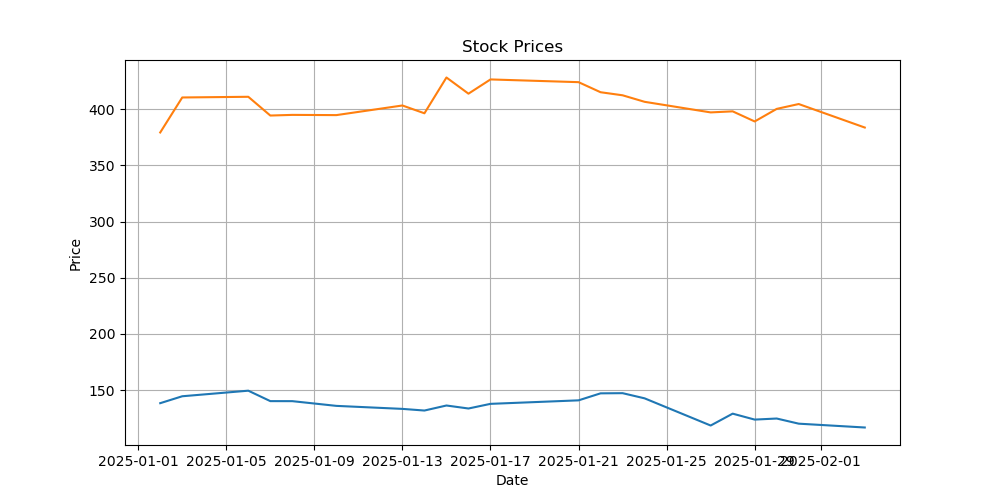

In [11]:
# Create a new executor with the user-defined function
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)
code_writer_agent_system_message += executor.format_functions_for_prompt()

# Let's update the agents with the new system message
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="NEVER",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

Image(os.path.join("coding", "stock_prices_YTD_plot.png"))

In [12]:
# Planning and Stock Report Generation
# Build a group chat
# This group chat will include these agents:
# User_proxy or Admin: to allow the user to comment on the report and ask the writer to refine it.
# Planner: to determine relevant information needed to complete the task.
# Engineer: to write code using the defined plan by the planner.
# Executor: to execute the code written by the engineer.
# Writer: to write the report.
task = "Write a blogpost about the stock price performance of "\
"Nvidia in the past month. Today's date is 2025-02-03."

user_proxy = autogen.ConversableAgent(
    name="Admin",
    system_message="Give the task, and send "
    "instructions to writer to refine the blog post.",
    code_execution_config=False,
    llm_config=llm_config,
    human_input_mode="ALWAYS",
)

planner = autogen.ConversableAgent(
    name="Planner",
    system_message="Given a task, please determine "
    "what information is needed to complete the task. "
    "Please note that the information will all be retrieved using"
    " Python code. Please only suggest information that can be "
    "retrieved using Python code. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps. If a step fails, try to "
    "workaround",
    description="Planner. Given a task, determine what "
    "information is needed to complete the task. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps",
    llm_config=llm_config,
)

engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=llm_config,
    description="An engineer that writes code based on the plan "
    "provided by the planner.",
)

executor = autogen.ConversableAgent(
    name="Executor",
    system_message="Execute the code written by the "
    "engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "coding",
        "use_docker": False,
    },
)

writer = autogen.ConversableAgent(
    name="Writer",
    llm_config=llm_config,
    system_message="Writer."
    "Please write blogs in markdown format (with relevant titles)"
    " and put the content in pseudo ```md``` code block. "
    "You take feedback from the admin and refine your blog.",
    description="Writer."
    "Write blogs based on the code execution results and take "
    "feedback from the admin to refine the blog."
)

groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, writer, executor, planner],
    messages=[],
    max_round=10,
)

manager = autogen.GroupChatManager(
    groupchat=groupchat, llm_config=llm_config
)

In [13]:
# start the group chat
groupchat_result = user_proxy.initiate_chat(
    manager,
    message=task,
)

Admin (to chat_manager):

Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2025-02-03.

--------------------------------------------------------------------------------

Next speaker: Planner


>>>>>>>> USING AUTO REPLY...
Planner (to chat_manager):

To write a blog post about Nvidia's stock price performance over the past month (from January 3, 2025, to February 3, 2025), you will need the following information:

1. **Stock Price Data**: Historical stock price data for Nvidia from January 3, 2025, to February 3, 2025, including:
   - Opening prices
   - Closing prices
   - High prices
   - Low prices
   - Volume of shares traded

2. **Summary Statistics**: Calculate key metrics that give insight into Nvidia's stock performance:
   - Average closing price over the month
   - The highest and lowest closing prices in the time period
   - Percentage change in closing price from January 3 to February 3
   
3. **Significant Events**: Research a

In [14]:
# Add a speaker selection policy
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, writer, executor, planner],
    messages=[],
    max_round=10,
    allowed_or_disallowed_speaker_transitions={
        user_proxy: [engineer, writer, executor, planner],
        engineer: [user_proxy, executor],
        writer: [user_proxy, planner],
        executor: [user_proxy, engineer, planner],
        planner: [user_proxy, engineer, writer],
    },
    speaker_transitions_type="allowed",
)

manager = autogen.GroupChatManager(
    groupchat=groupchat, llm_config=llm_config
)

groupchat_result = user_proxy.initiate_chat(
    manager,
    message=task,
)

Admin (to chat_manager):

Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2025-02-03.

--------------------------------------------------------------------------------

Next speaker: Planner


>>>>>>>> USING AUTO REPLY...
Planner (to chat_manager):

To write a blog post about Nvidia's stock price performance over the past month (from January 3, 2025, to February 3, 2025), you will need the following information:

1. **Stock Price Data**: Historical stock price data for Nvidia from January 3, 2025, to February 3, 2025, including:
   - Opening prices
   - Closing prices
   - High prices
   - Low prices
   - Volume of shares traded

2. **Summary Statistics**: Calculate key metrics that give insight into Nvidia's stock performance:
   - Average closing price over the month
   - The highest and lowest closing prices in the time period
   - Percentage change in closing price from January 3 to February 3
   
3. **Significant Events**: Research a

In [1]:
# pip install autogenstudio
# autogenstudio ui --port 8081

INFO:     Loading environment from 'C:\Users\long8\AppData\Local\Temp\tmpmb0393u9.env'
┌───────────────────── Traceback (most recent call last) ─────────────────────┐
│ D:\anaconda3\Lib\site-packages\autogenstudio\cli.py:62 in ui                │
│                                                                             │
│    59 │   │   temp_env.write(f"{key}={value}\n")                            │
│    60 │   temp_env.flush()                                                  │
│    61 │                                                                     │
│ >  62 │   uvicorn.run(                                                      │
│    63 │   │   "autogenstudio.web.app:app",                                  │
│    64 │   │   host=host,                                                    │
│    65 │   │   port=port,                                                    │
│                                                                             │
│ ┌──────────────────────────────